In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.facecolor"] = "white"

In [2]:
url = "https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Tips/tips.csv"
df = pd.read_csv(url)

In [3]:
df.head(10)

,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size
0,0,16.99,1.01,Female,No,Sun,Dinner,2
1,1,10.34,1.66,Male,No,Sun,Dinner,3
2,2,21.01,3.50,Male,No,Sun,Dinner,3
3,3,23.68,3.31,Male,No,Sun,Dinner,2
4,4,24.59,3.61,Female,No,Sun,Dinner,4
5,5,25.29,4.71,Male,No,Sun,Dinner,4
6,6,8.77,2.00,Male,No,Sun,Dinner,2
7,7,26.88,3.12,Male,No,Sun,Dinner,4
8,8,15.04,1.96,Male,No,Sun,Dinner,2
9,9,14.78,3.23,Male,No,Sun,Dinner,2


### 1. Delete the Unnamed 0 column

In [4]:
df = df.drop(columns=["Unnamed: 0"])

### 2. Plot the total_bill column histogram

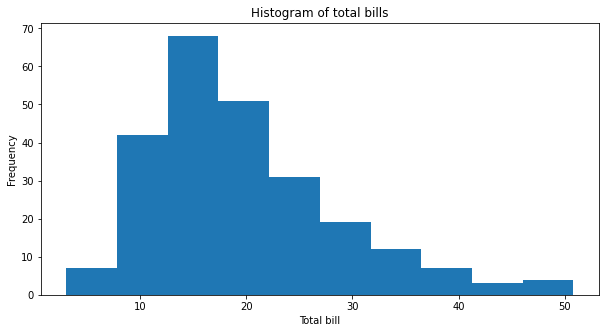

In [5]:
#| label: fig-hist
#| fig-cap: "A histogram with frequency of total bill values"
total_bill_values = df["total_bill"]
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(10,5))
ax.hist(total_bill_values, bins = 10, density=False)
ax.set_title("Histogram of total bills")
ax.set_xlabel("Total bill")
ax.set_ylabel("Frequency")
plt.show()

### 3. Create a scatter plot presenting the relationship between total_bill and tip

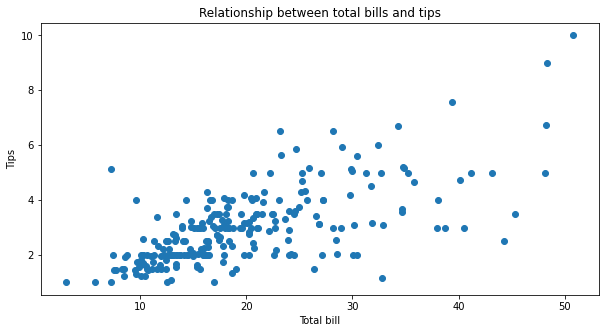

In [6]:
#| label: fig-bill/tips
#| fig-cap: "A scatter plot to display relationship between total bill values and tips"
tips = df["tip"]
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(10,5))
ax.scatter(x=total_bill_values,y=tips)
ax.set_title("Relationship between total bills and tips")
ax.set_xlabel("Total bill")
ax.set_ylabel("Tips")
plt.show()

### 4. Create one image with the relationship of total_bill, tip and size.

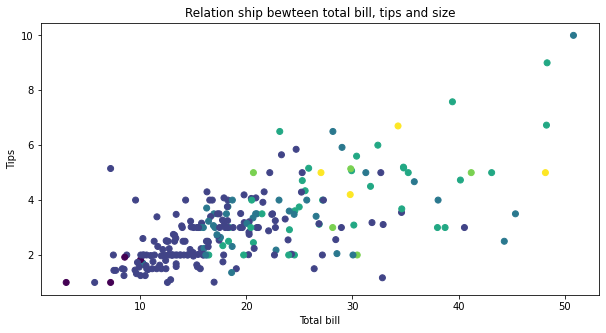

In [7]:
#| label: fig-bill_tips_size
#| fig-cap: "A scatter plot to display relationship between total bill, tips adn size"
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(10,5))
ax.scatter(x=total_bill_values,y=tips, c=df["size"])
ax.set_title("Relation ship bewteen total bill, tips and size")
ax.set_xlabel("Total bill")
ax.set_ylabel("Tips")

plt.show()

### 5. Present the relationship between days and total_bill value.

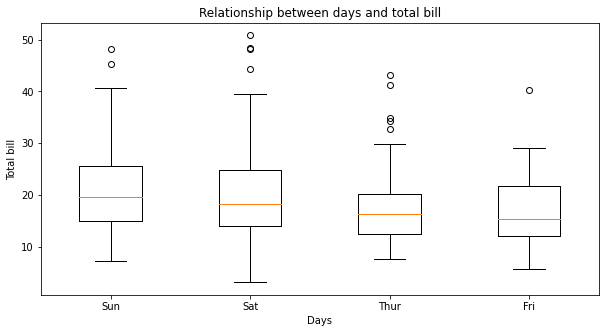

In [8]:
#| label: fig-bill_days
#| fig-cap: "Displaying relationship between total bill and days"
sunday_data = np.array(df[df["day"] == "Sun"]["total_bill"])
saturday_data = np.array(df[df["day"] == "Sat"]["total_bill"])
Thursday_data = np.array(df[df["day"] == "Thur"]["total_bill"])
Friday_data = np.array(df[df["day"] == "Fri"]["total_bill"])
total_bill_days = [sunday_data, saturday_data, Thursday_data, Friday_data]
labels = df["day"].unique()
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(10,5))
ax.boxplot(x=total_bill_days,labels=labels)
ax.set_title("Relationship between days and total bill")
ax.set_xlabel("Days")
ax.set_ylabel("Total bill")
plt.show()

### 6. Create a scatter plot with the day as the y-axis and tip as the x-axis, differ the dots by sex

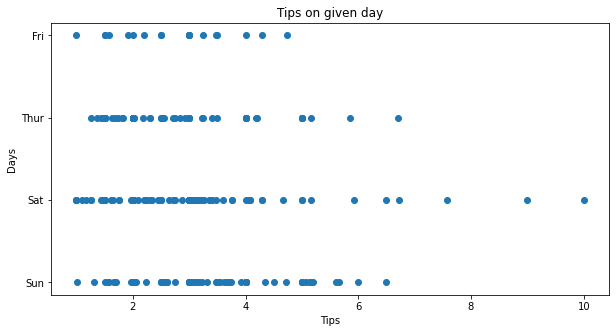

In [9]:
#| label: fig-tips_days
#| fig-cap: "Scatter plot with tips and days"
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(10,5))
ax.scatter(y=df["day"],x=df["tip"])
ax.set_title("Tips on given day")
ax.set_xlabel("Tips")
ax.set_ylabel("Days")
plt.show()

### 7. Create a box plot presenting the total_bill per day differentiation the time (Dinner or Lunch)

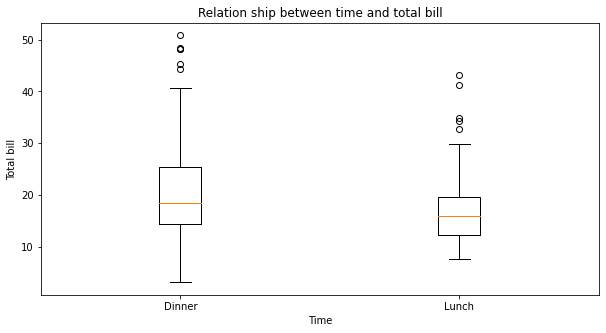

In [10]:
#| label: fig-bill_time
#| fig-cap: "Displaying relationship between total bill and time"
#Prepare data for box plot
dinner_data = np.array(df[df["time"] == "Dinner"]["total_bill"])
lunch_data = np.array(df[df["time"] == "Lunch"]["total_bill"])
total_bill_time = [dinner_data, lunch_data]
time_labels = df["time"].unique()

fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(10,5))
ax.boxplot(x=total_bill_time,labels=time_labels)
ax.set_title("Relation ship between time and total bill")
ax.set_xlabel("Time")
ax.set_ylabel("Total bill")
plt.show()

### 8. Create two histograms of the tip value based for Dinner and Lunch. They must be side by side

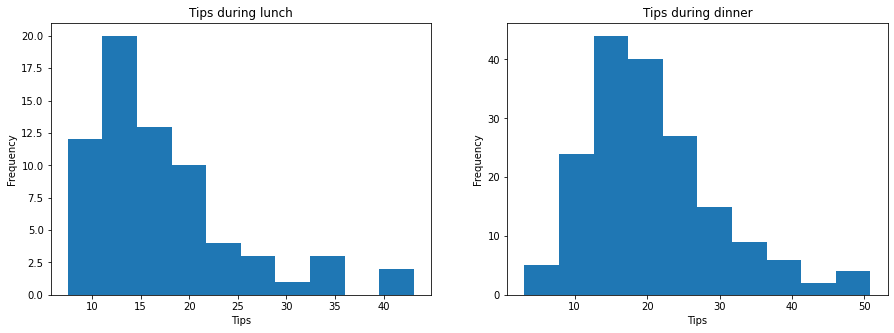

In [11]:
#| label: fig-tips_time
#| fig-cap: "Displaying values of tips during lunch and dinner"

dinner_tip_data = np.array(df[df["time"] == "Dinner"]["tip"])
lunch_tip_data = np.array(df[df["time"] == "Lunch"]["tip"])
total_bill_time = [dinner_data, lunch_data]

fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(15, 5))

ax_lunch = ax[0].hist(x=lunch_data, bins=10)
ax[0].set_title("Tips during lunch")
ax[0].set_xlabel("Tips")
ax[0].set_ylabel("Frequency")

ax_dinner = ax[1].hist(x=dinner_data,bins=10)
ax[1].set_title("Tips during dinner")
ax[1].set_xlabel("Tips")
ax[1].set_ylabel("Frequency")
plt.show()

### 9. Create two scatterplots graphs, one for Male and another for Female, presenting the total_bill value and tip relationship, differing by smoker or no smoker

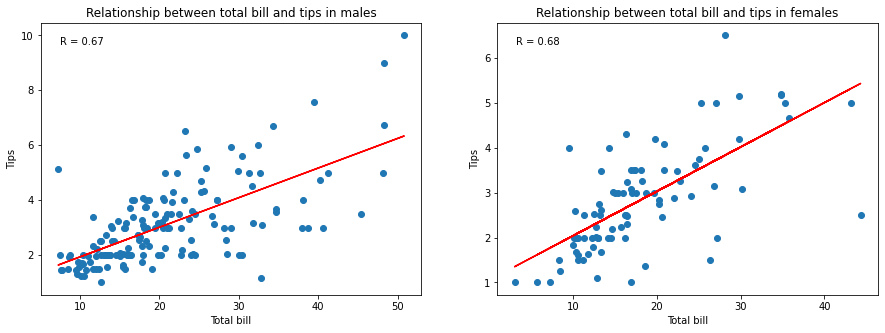

In [12]:
#| label: fig-bil_tips_sex
#| fig-cap: "Exploring correlation between total bills and tips based on sex"

#Prepare data for scatter plot
male_bill_tip = df[df["sex"]=="Male"]
female_bill_tip = df[df["sex"]=="Female"]
labels_sex = df["sex"].unique()

fig, (ax_male, ax_female) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Male scatter plot with trendline and R value
x_male = male_bill_tip["total_bill"]
y_male = male_bill_tip["tip"]
ax_male.scatter(x_male, y_male)
ax_male.set_title("Relationship between total bill and tips in males")
ax_male.set_xlabel("Total bill")
ax_male.set_ylabel("Tips")
z_male = np.polyfit(x_male, y_male, 1)
p_male = np.poly1d(z_male)
ax_male.plot(x_male, p_male(x_male), "r-")
r_male = np.corrcoef(x_male, y_male)[0, 1]
ax_male.text(0.05, 0.95, f"R = {r_male:.2f}", transform=ax_male.transAxes, ha='left', va='top')

# Female scatter plot with trendline and R value
x_female = female_bill_tip["total_bill"]
y_female = female_bill_tip["tip"]
ax_female.scatter(x_female, y_female)
ax_female.set_title("Relationship between total bill and tips in females")
ax_female.set_xlabel("Total bill")
ax_female.set_ylabel("Tips")
z_female = np.polyfit(x_female, y_female, 1)
p_female = np.poly1d(z_female)
ax_female.plot(x_female, p_female(x_female), "r-")
r_female = np.corrcoef(x_female, y_female)[0, 1]
ax_female.text(0.05, 0.95, f"R = {r_female:.2f}", transform=ax_female.transAxes, ha='left', va='top')

plt.show()